In [3]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [2]:
import pandas as pd

df = pd.read_csv("dataset_komentar.csv")
df = df.dropna(subset=['komentar'])
df = df.sample(n=1000, random_state=42)

In [4]:
tfidf = TfidfVectorizer(
    max_features=3000
)

X = tfidf.fit_transform(df['komentar'])

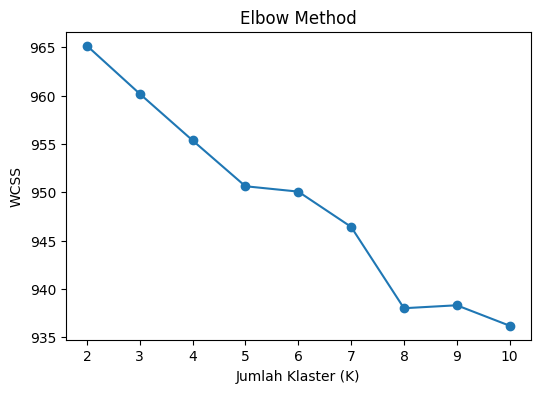

In [5]:
wcss = []

K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K_range, wcss, marker='o')
plt.xlabel('Jumlah Klaster (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [6]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

In [7]:
terms = tfidf.get_feature_names_out()

def top_terms(cluster_id, top_n=10):
    center = kmeans.cluster_centers_[cluster_id]
    indices = center.argsort()[-top_n:][::-1]
    return [terms[i] for i in indices]

for i in range(k):
    print(f"\nTopik Klaster {i}:")
    print(", ".join(top_terms(i)))


Topik Klaster 0:
pajak, dpr, negara, bayar, rakyat, yg, mereka, di, nya, naikin

Topik Klaster 1:
pak, purbaya, setuju, ini, di, rakyat, pur, mantap, yg, sehat

Topik Klaster 2:
dewan, rakyat, perampok, pemeras, anggota, perwakilan, dpr, penipu, pajak, yg

Topik Klaster 3:
dpr, di, itu, rakyat, yang, dan, ga, anggota, yg, ada

Topik Klaster 4:
gaji, tunjangan, dpr, umr, aja, pajak, hilangkan, dan, di, gak
